In [2]:
from decouple import config
import os
from pyspark import SparkConf
from pyspark.sql.session import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T

In [3]:
token = config('TOKEN')
cluster_id = config('CLUSTER_ID')
workspace_url = config('WORKSPACE_URL')
connection_string = (f"sc://{workspace_url}:443/;"f"token={token};""use_ssl=true;"
                     f"x-databricks-cluster-id={cluster_id}")

In [4]:
os.environ['SPARK_REMOTE'] = connection_string 
spark = SparkSession.builder.getOrCreate()
# test check connection to cluster
spark.sql("show catalogs").show()

+--------------------+
|             catalog|
+--------------------+
|      103020_ctg_dev|
|__databricks_inte...|
|    _daiwt_warehouse|
|   _dbt_catalog_olya|
|        aaugustyniak|
|abc_press_holding...|
|             abe_cat|
|            abe_demo|
|            acme_avo|
|    acme_inc_catalog|
|         adnan_demos|
|               adobe|
|     adrian_tompkins|
|            adubey_1|
|              ae_dev|
|            afolting|
|         airbus-demo|
|       airbus-demouc|
|          airbus_oee|
|        airties_bim1|
+--------------------+
only showing top 20 rows



In [11]:
users = spark.sql("select * from kmahoney.default.sample_user_data")

In [12]:
import matplotlib.pyplot as plt

users_pdf = users.toPandas()

<Axes: xlabel='device_type'>

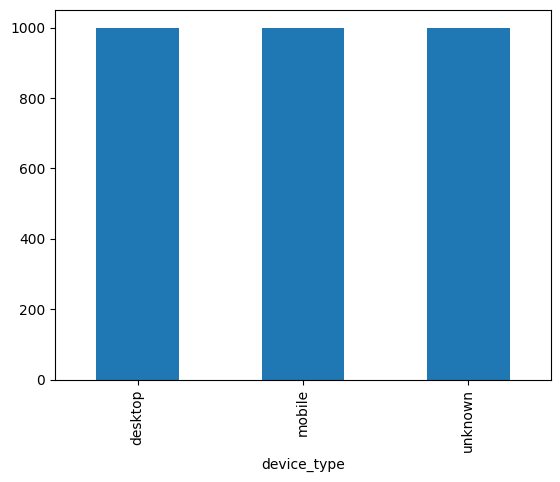

In [19]:
users_pdf.groupby(['device_type'])['device_type'].count().plot(kind = 'bar')